In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [3]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset.
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the urban city dataframe.
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# Create a bubble chart

In [18]:
# Get the number of rides for urban cities.
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Create the suburban and rural ride count.
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
# Get average fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
# Get the average number of drivers for each urban city.
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]

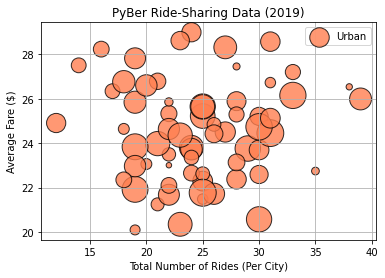

In [24]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=[i*10 for i in urban_driver_count],
           edgecolor="k",
           c="coral",
           linewidth=1,
           alpha=0.8,
           label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()

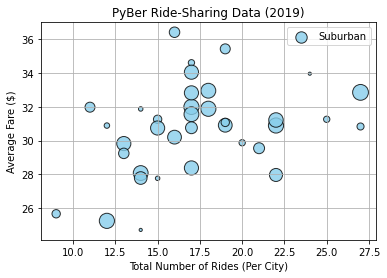

In [25]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()

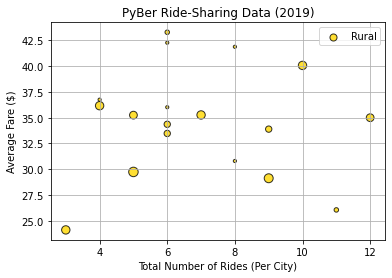

In [26]:
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,
           c="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()

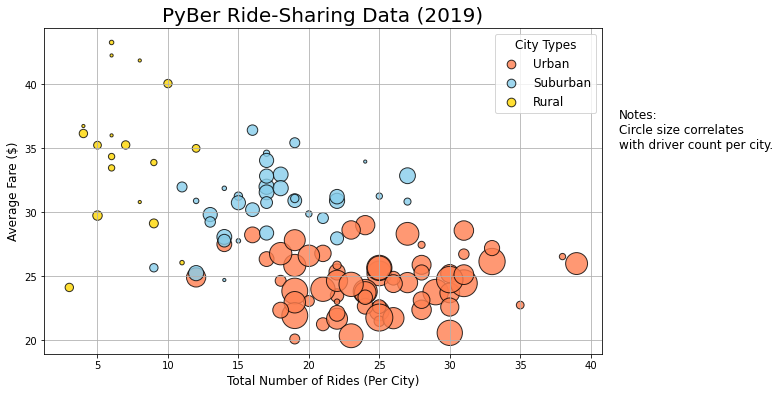

In [27]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=[i*10 for i in urban_driver_count],
           edgecolor="k",
           c="coral",
           linewidth=1,
           alpha=0.8,
           label="Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,
           c="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid()

#Create a legand
lgnd=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size.
plt.text(42,35,"Notes:\nCircle size correlates\nwith driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png",bbox_inches="tight",facecolor="w",edgecolor="w")
plt.show()

# Statistic summary

In [38]:
# Get summary statistics
urban_cities_df.describe(),suburban_cities_df.describe(),rural_cities_df.describe()

(              fare       ride_id  driver_count
 count  1625.000000  1.625000e+03   1625.000000
 mean     24.525772  4.873485e+12     36.678154
 std      11.738649  2.907440e+12     20.075545
 min       4.050000  1.458810e+10      3.000000
 25%      14.550000  2.400244e+12     22.000000
 50%      24.640000  4.711188e+12     37.000000
 75%      34.580000  7.451579e+12     52.000000
 max      44.970000  9.991538e+12     73.000000,
              fare       ride_id  driver_count
 count  625.000000  6.250000e+02    625.000000
 mean    30.970128  4.971015e+12     13.712000
 std     10.677508  2.912410e+12      8.042372
 min     12.050000  3.218337e+08      1.000000
 25%     21.970000  2.364253e+12      5.000000
 50%     30.750000  5.053221e+12     16.000000
 75%     39.830000  7.551674e+12     21.000000
 max     49.960000  9.917744e+12     25.000000,
              fare       ride_id  driver_count
 count  125.000000  1.250000e+02    125.000000
 mean    34.623440  4.647746e+12      4.296000
 s

In [39]:
urban_ride_count.describe(),suburban_ride_count.describe(),rural_ride_count.describe()

(count    66.000000
 mean     24.621212
 std       5.408726
 min      12.000000
 25%      21.000000
 50%      24.000000
 75%      28.000000
 max      39.000000
 Name: ride_id, dtype: float64,
 count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

In [34]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [35]:
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2),round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [37]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode(),suburban_ride_count.mode(),rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [40]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [42]:
 # Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [44]:
 # Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count=np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [46]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [47]:
# Get the fares for the urban cities
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [48]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [50]:
suburban_fares=suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

rural_fares=rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [54]:
urban_drivers=urban_cities_df["driver_count"]
suburban_drivers=suburban_cities_df["driver_count"]
rural_drivers=rural_cities_df["driver_count"]

In [55]:
mean_u_d=np.mean(urban_drivers)
median_u_d=np.median(urban_drivers)
mode_u_d=sts.mode(urban_drivers)
print("urban mean"+str(round(mean_u_d,2)))
print("urban median"+str(round(median_u_d,2)))
print("urban mode"+str(mode_u_d))

mean_s_d=np.mean(suburban_drivers)
median_s_d=np.median(suburban_drivers)
mode_s_d=sts.mode(suburban_drivers)
print("suburban mean"+str(round(mean_s_d,2)))
print("suburban median"+str(round(median_s_d,2)))
print("suburban mode"+str(mode_s_d))

mean_r_d=np.mean(rural_drivers)
median_r_d=np.median(rural_drivers)
mode_r_d=sts.mode(rural_drivers)
print("rural mean"+str(round(mean_r_d,2)))
print("rural median"+str(round(median_r_d,2)))
print("rural mode"+str(mode_r_d))

urban mean36.68
urban median37.0
urban modeModeResult(mode=array([39]), count=array([86]))
suburban mean13.71
suburban median16.0
suburban modeModeResult(mode=array([20]), count=array([79]))
rural mean4.3
rural median4.0
rural modeModeResult(mode=array([1]), count=array([32]))


# Box-and-Whisker Plots for Ride Count Data

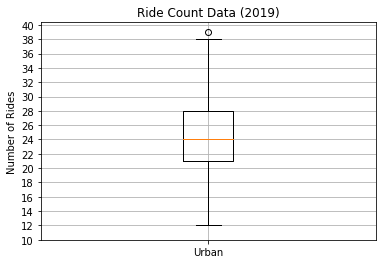

In [56]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_ride_count,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

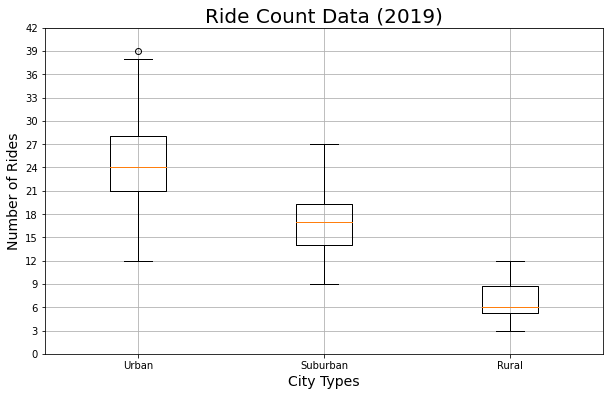

In [58]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png",facecolor="w",edgecolor="w")
plt.show()

In [63]:
# Get the city that matches 39.
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the higest rider count.")

West Angela has the higest rider count.


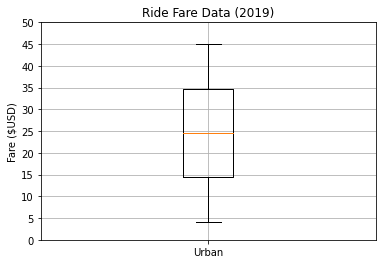

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [66]:
# Create a box-and-whisker plot for the urban fare data.
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_fares,labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

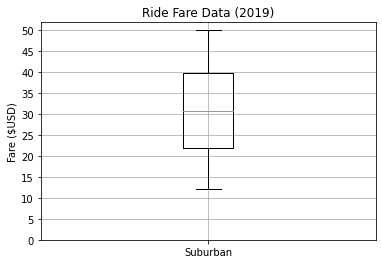

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [67]:
x_labels=["Suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_fares,labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,5))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

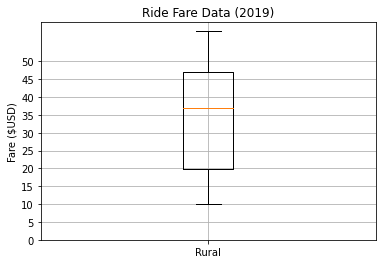

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [68]:
x_labels=["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_fares,labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,5))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

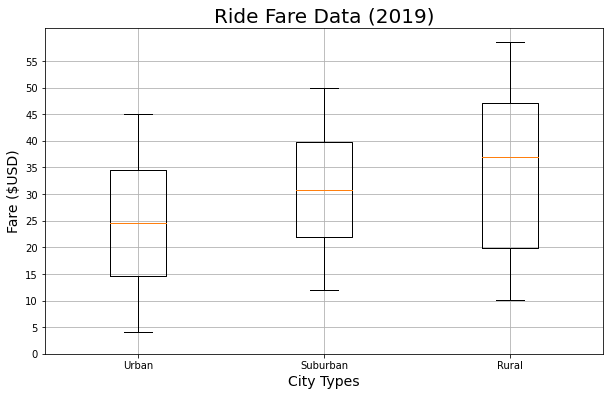

In [72]:
x_labels=["Urban","Suburban","Rural"]
fare_data=[urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel("Fare ($USD)",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png",facecolor="w",edgecolor="w")
plt.show()

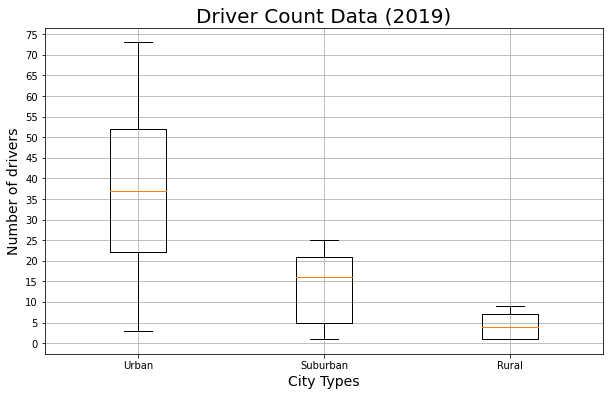

In [73]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels=["Urban","Suburban","Rural"]
driver_data=[urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel("Number of drivers",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png",facecolor="w",edgecolor="w")
plt.show()